Firstly we will consider all the necessary packages for completing the task

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Using the info() method we will get the details about the dataset. By this we will understand that how many null values are present in the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the dataset we find null values in age and embarked column. So we will start to fill the values in the data using statistics measures.

In [4]:
age=data['Age'].mean()
age

29.69911764705882

In [5]:
data['Age'].fillna(age,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
embark=data['Embarked'].mode()[0]
embark

'S'

After filliing the values we will now form the X and Y dataset for making the prediction easy. In the X dataset we will have columns which will have the parameters that help us in making the prediction.

In [7]:
x=pd.DataFrame(data.loc[: ,
                     ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [8]:
y=pd.DataFrame(data.loc[:,['Survived']])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [9]:
y.Survived.unique()
#Using this method we will come to know the different classes in the survived column.

array([0, 1])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

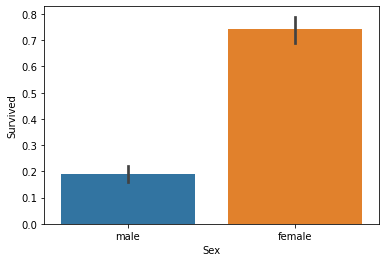

In [10]:
sns.barplot(x=x.Sex,y=y.Survived)
#It shoes the relation between survived rate in male and female.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

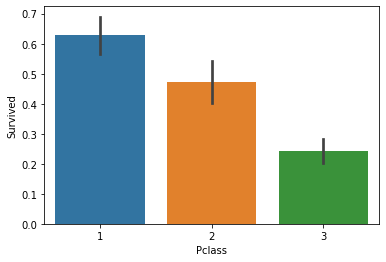

In [11]:
sns.barplot(x=x.Pclass,y=y.Survived)
#It shoes the relation between survived rate in different classes.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

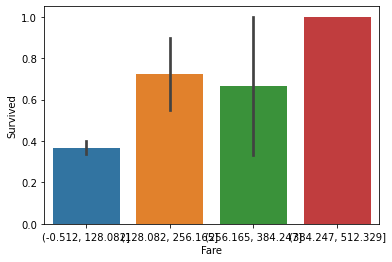

In [12]:
fare=pd.cut(x['Fare'],4)
sns.barplot(x=fare,y=y.Survived)
#It shoes the relation between survived rate in different types of fare.

In our data we will have categorical values and we will have some values in characters. So to train model without any problem we need to preprocess the data. For that we will use preprocessing form sklearn .

In [13]:
from sklearn import preprocessing
labels=preprocessing.LabelEncoder().fit(x['Sex'])
x['Sex']=labels.transform(x['Sex'])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [14]:
labele=preprocessing.LabelEncoder().fit(x['Embarked'])
x['Embarked']=labele.transform(x['Embarked'])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Now we will check the correlation of the classes in X with that of the classes in Y dataset.

In [15]:
x.corrwith(y.Survived, method='pearson')

Pclass     -0.338481
Sex        -0.543351
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked   -0.163517
dtype: float64

After all the preprocessing of the data, the dataset is ready for training a model. We will use a decision tree for getting the prediction. We will now train the data .

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, random_state=35, test_size=0.25)
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
786,3,0,18.0,0,0,7.4958,2
636,3,1,32.0,0,0,7.9250,2
401,3,1,26.0,0,0,8.0500,2
811,3,1,39.0,0,0,24.1500,2
780,3,0,13.0,0,0,7.2292,0
...,...,...,...,...,...,...,...
249,2,1,54.0,1,0,26.0000,2
448,3,0,5.0,2,1,19.2583,0
33,2,1,66.0,0,0,10.5000,2
271,3,1,25.0,0,0,0.0000,2


In [17]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
500,3,1,17.000000,0,0,8.6625,2
417,2,0,18.000000,0,2,13.0000,2
432,2,0,42.000000,1,0,26.0000,2
881,3,1,33.000000,0,0,7.8958,2
49,3,0,18.000000,1,0,17.8000,2
...,...,...,...,...,...,...,...
23,1,1,28.000000,0,0,35.5000,2
413,2,1,29.699118,0,0,0.0000,2
871,1,0,47.000000,1,1,52.5542,2
835,1,0,39.000000,1,1,83.1583,0


In [18]:
ytrain

,Survived
786,1
636,0
401,0
811,0
780,1
...,...
249,0
448,1
33,0
271,1


In [19]:
ytest

,Survived
500,0
417,1
432,1
881,0
49,0
...,...
23,1
413,0
871,1
835,1


After training the data we will now fit the data in the decision tree classifier. 

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=1)

The below method helps us in knowing the size of the decision tree.

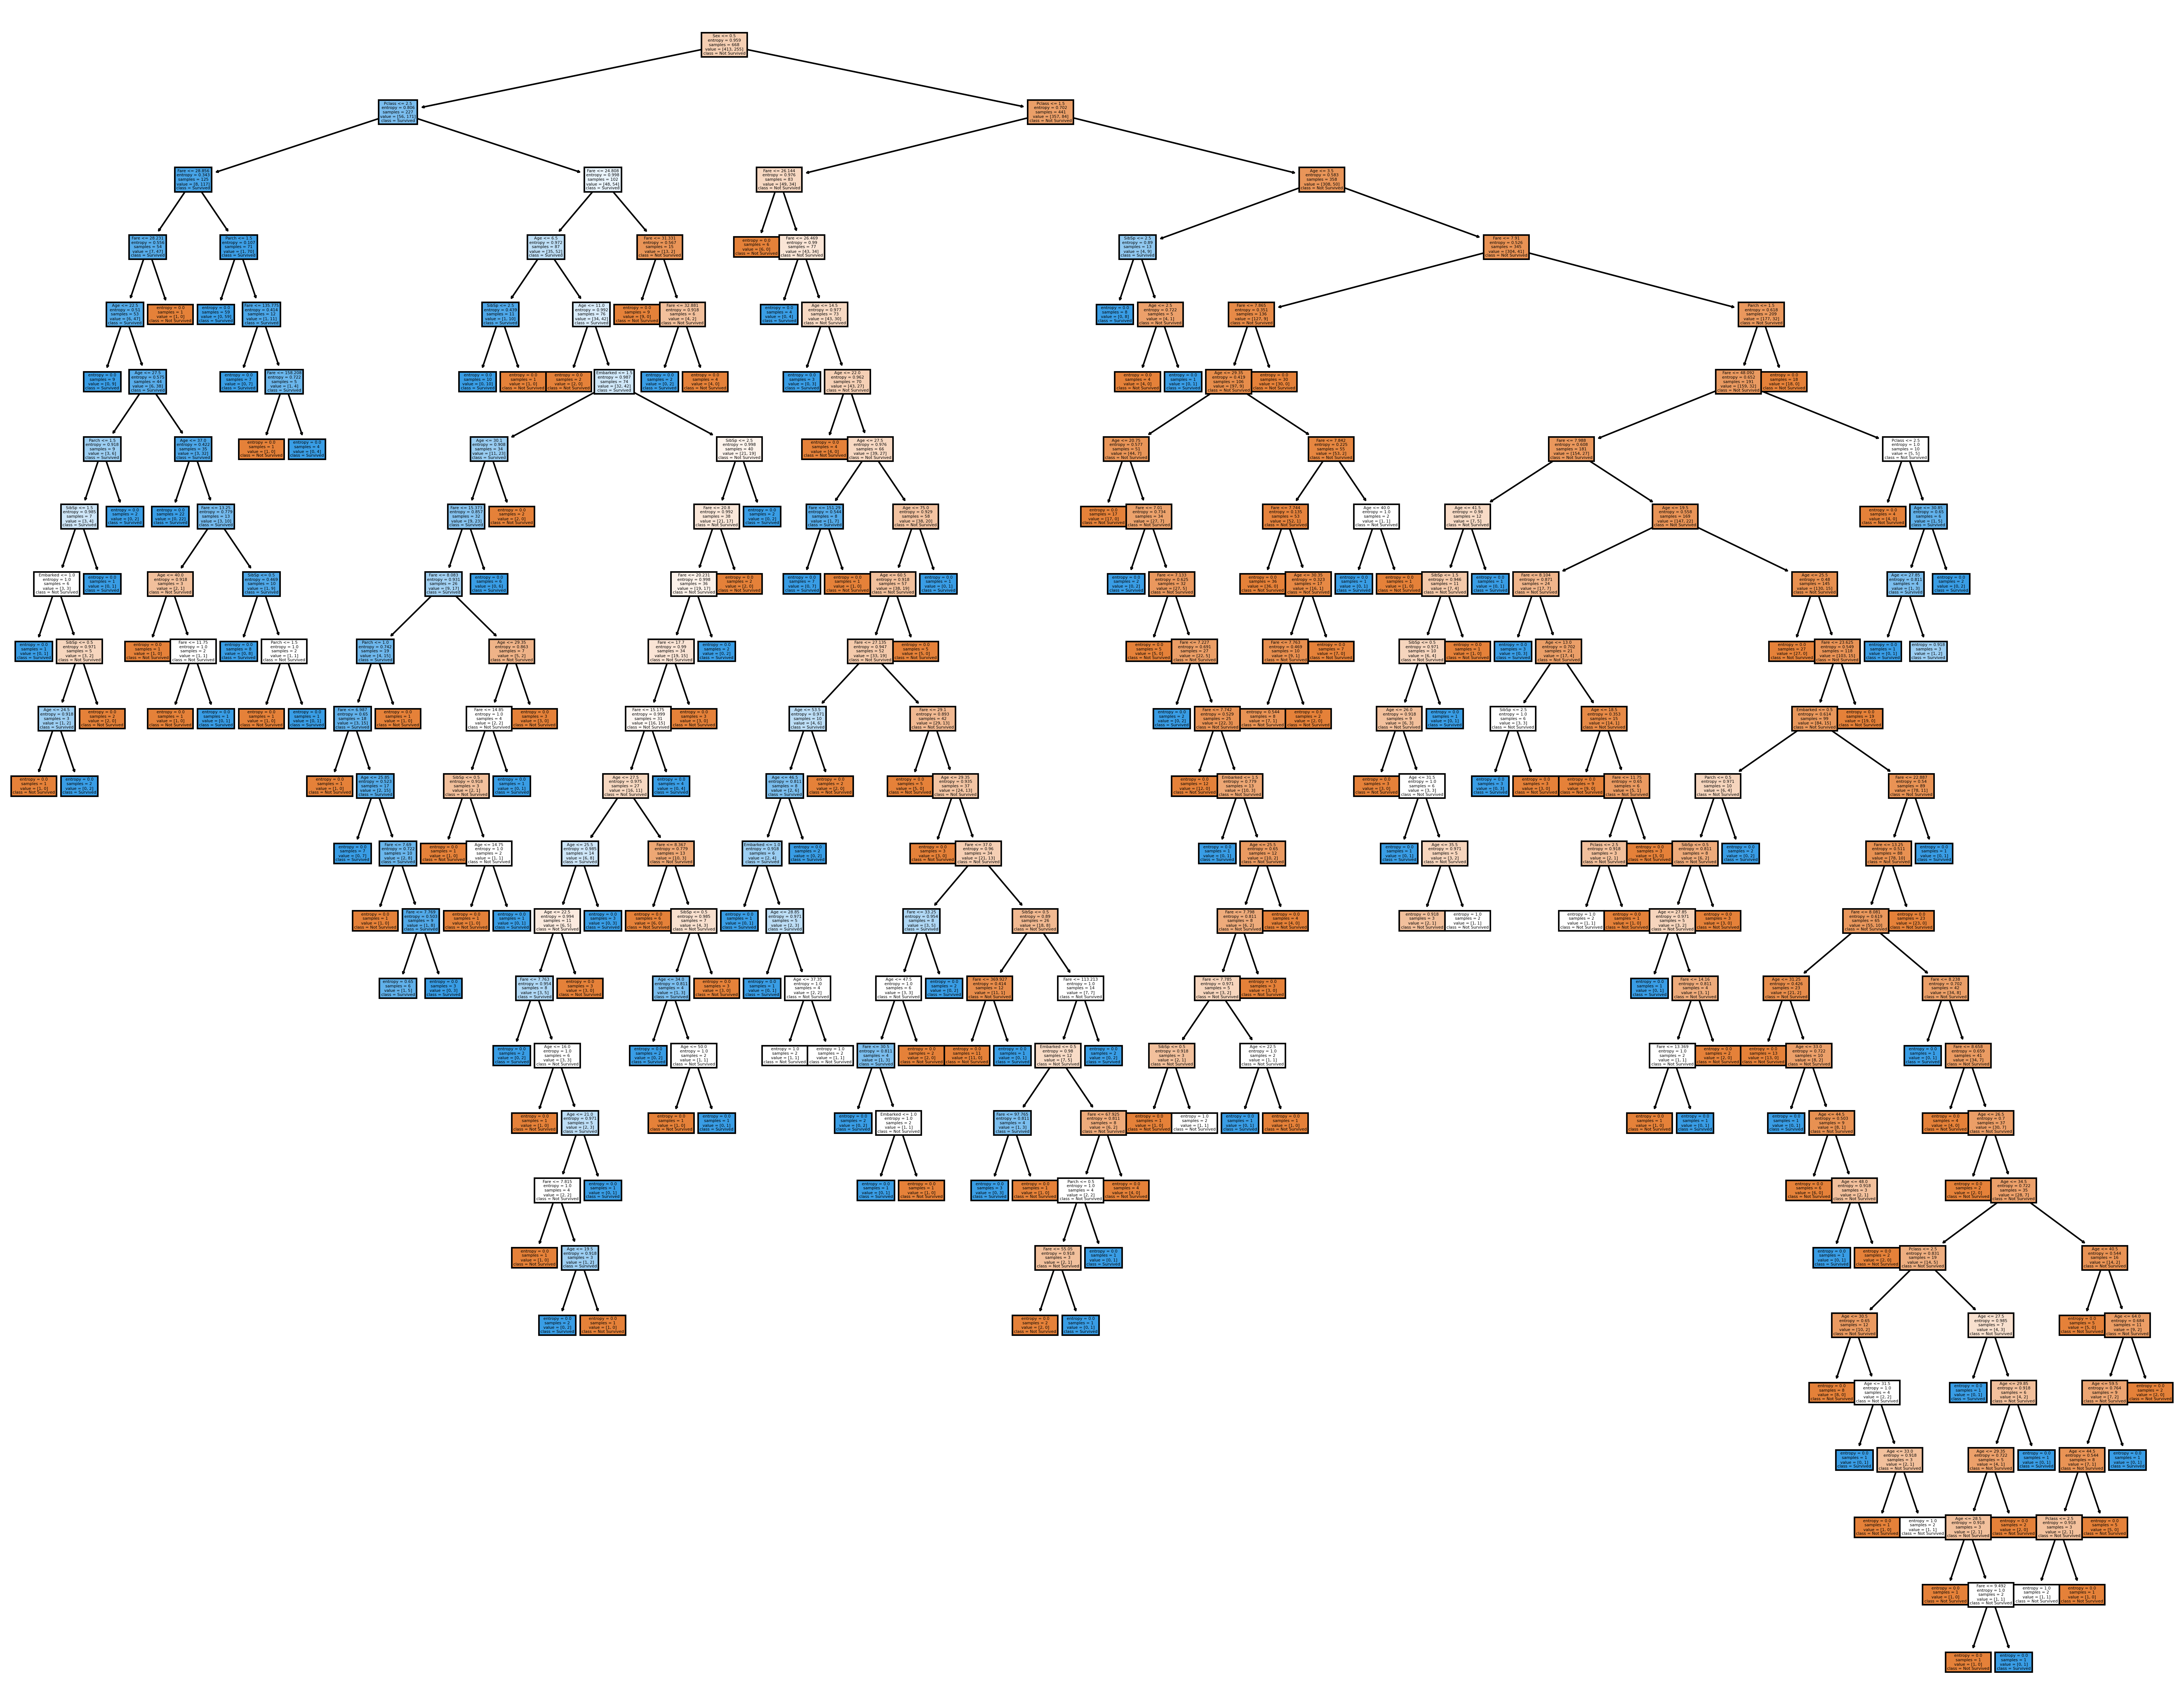

In [21]:
from sklearn import tree
plt.figure(figsize = ( 25 , 20) , dpi = 300.0)
_ =tree.plot_tree( dt,
                   feature_names = ['Pclass' ,'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
                   class_names = ['Not Survived' , 'Survived'] ,
                   filled = True)

In [22]:
print('The depth of the tree is:',dt.get_depth())
print('No.of leaves in tree is : ',dt.get_n_leaves())

The depth of the tree is: 24
No.of leaves in tree is :  161


We will now check the accuracy of the given tree.

In [23]:
from sklearn.metrics import accuracy_score
pred=dt.predict(xtest)
accuracy=accuracy_score(ytest,pred)
print('The accuracy of the tree is:',accuracy*100)

The accuracy of the tree is: 77.57847533632287


To improve the accuracy we need to prune the tree.

In [32]:
from sklearn.model_selection import GridSearchCV
params={'criterion':['entropy','gini'],'max_depth':range(1,13)}
grid_search = GridSearchCV(estimator = dt,
                            param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

# Apply fit() method to construct different decision trees with given parameters

grid_search = grid_search.fit(xtrain, ytrain)
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

When we prune the tree we will get the parameters for designing another model for the tree.

In [25]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=1)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

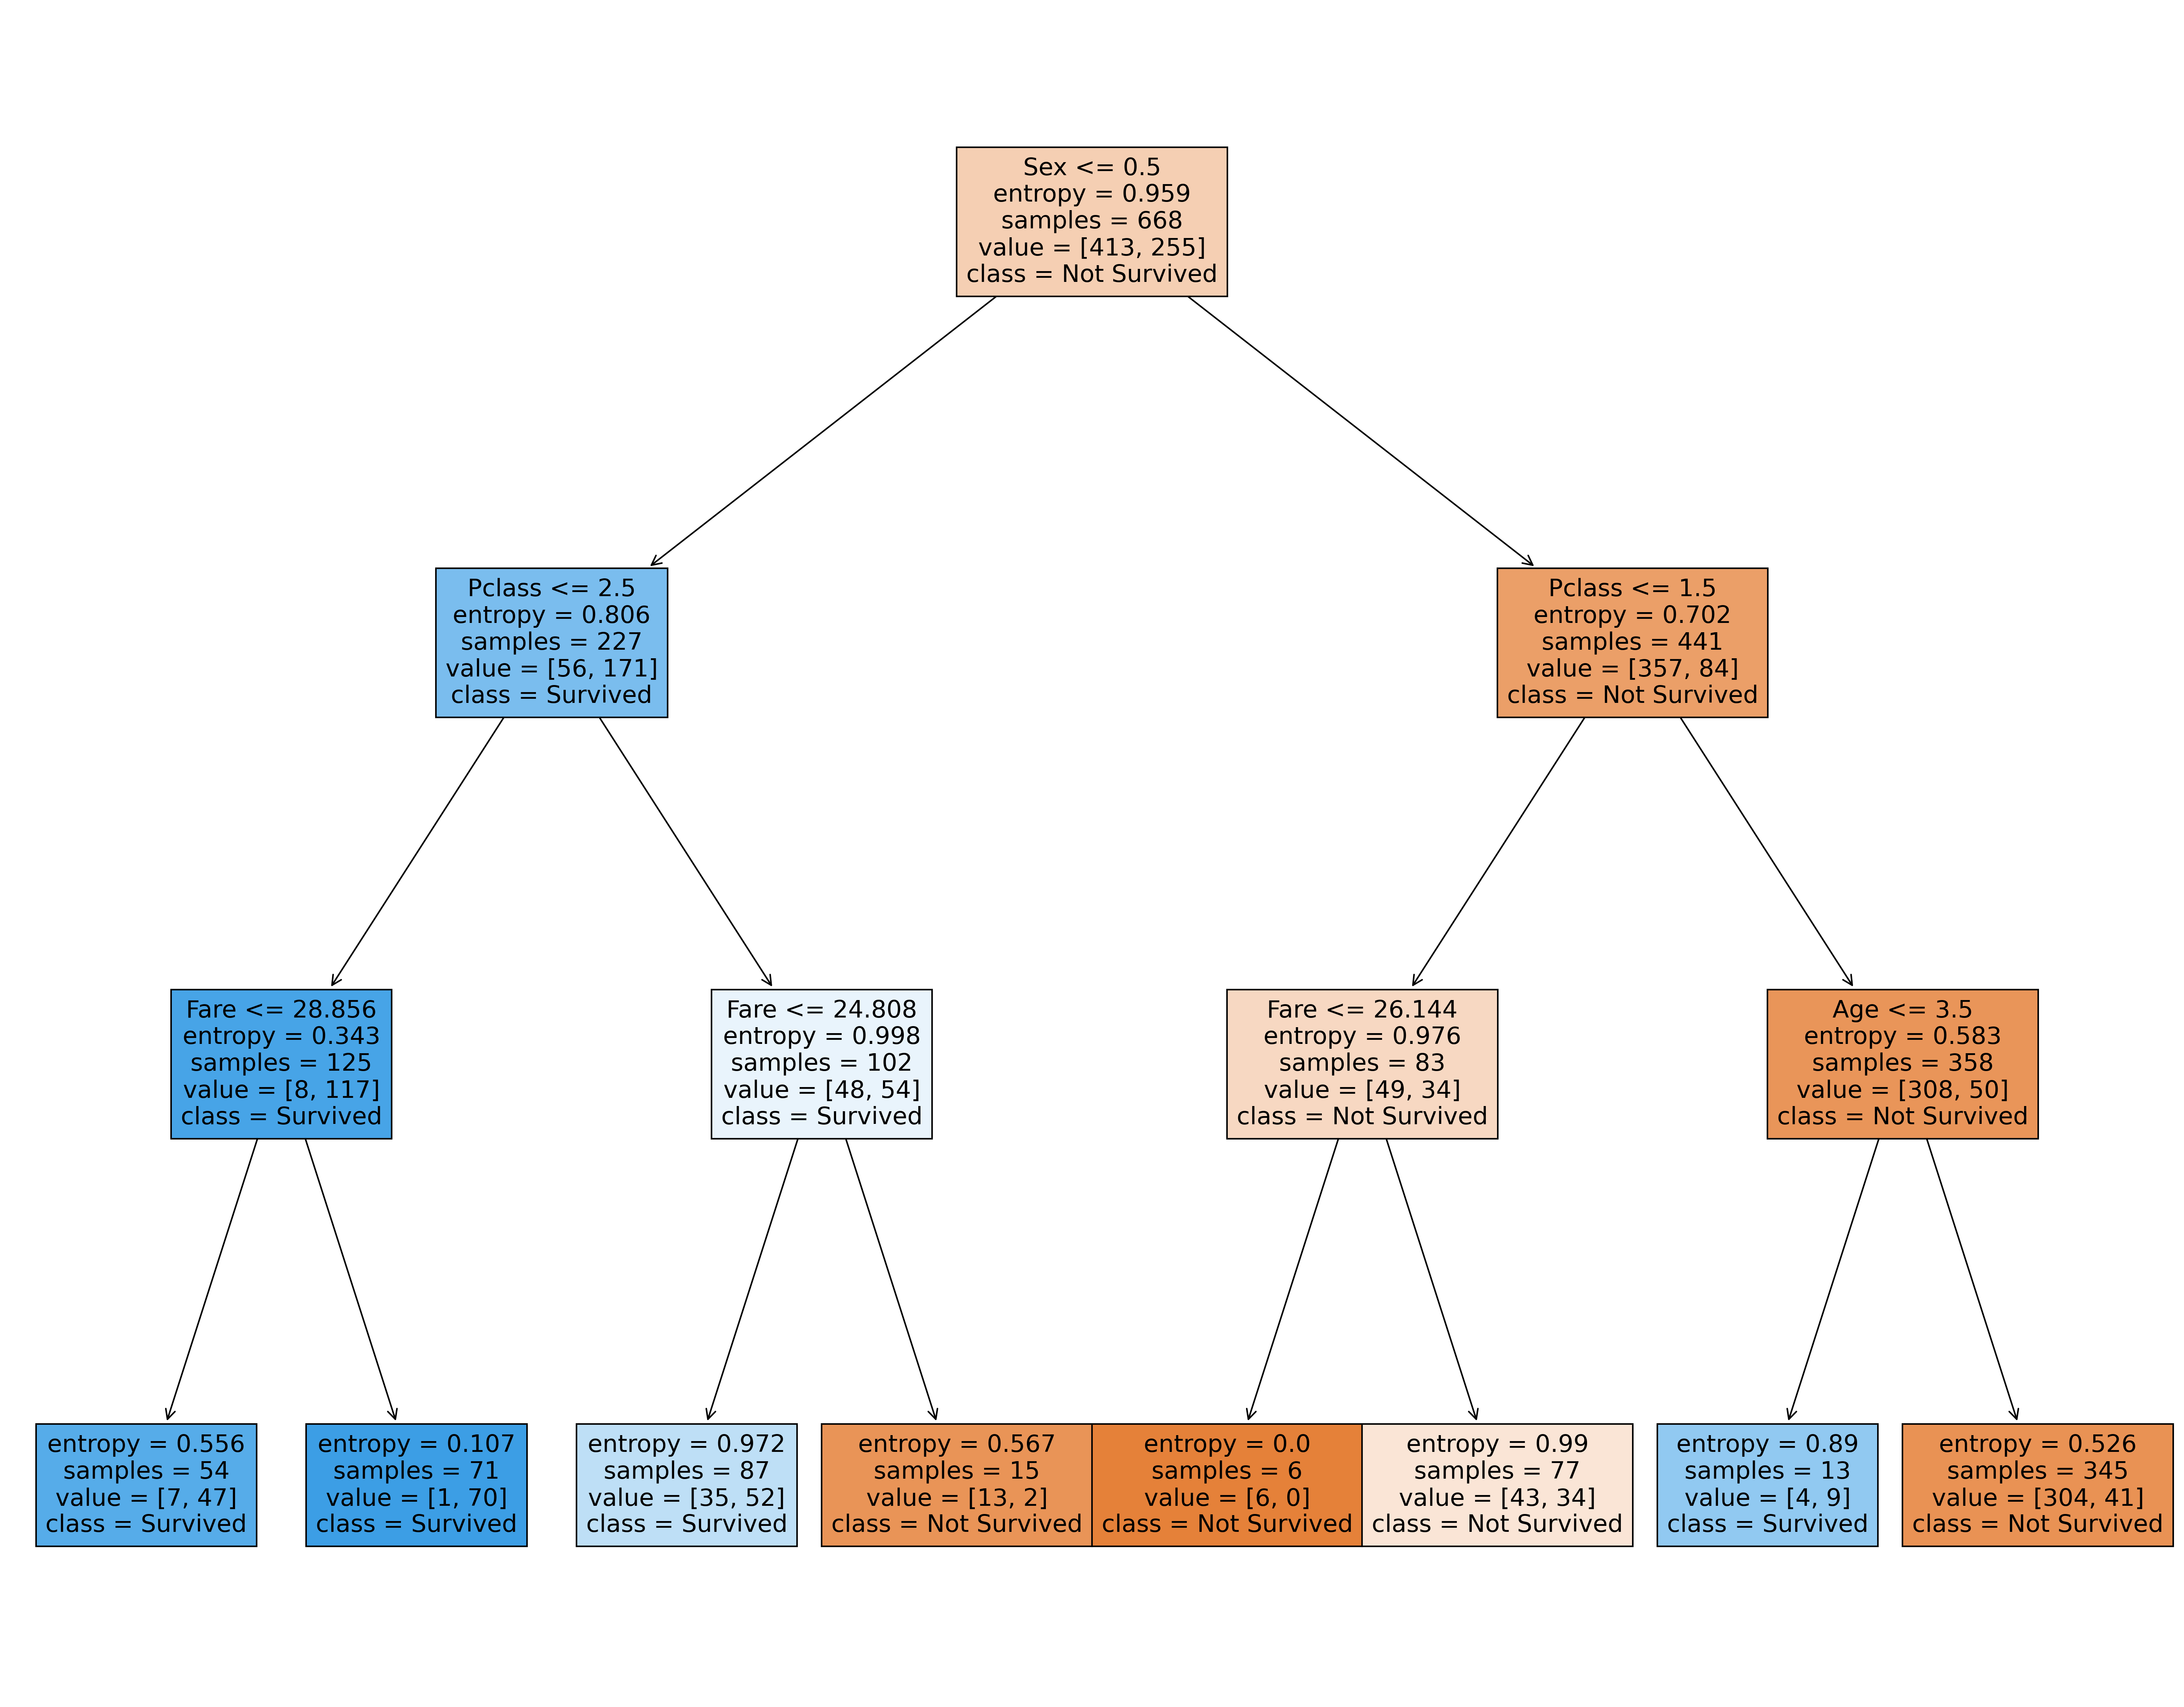

In [26]:
plt.figure(figsize = ( 25 , 20) , dpi = 300.0)
_ =tree.plot_tree( dtc,
                   feature_names = ['Pclass' ,'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
                   class_names = ['Not Survived' , 'Survived'] ,
                   filled = True)

The accuracy of the model is: 82.0627802690583


<AxesSubplot:>

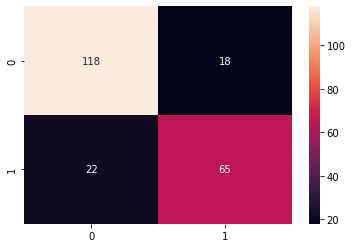

In [27]:
from sklearn.metrics import confusion_matrix
predy=dtc.predict(xtest)
modified_acc=accuracy_score(ytest,predy)
print('The accuracy of the model is:',modified_acc*100)
cm=confusion_matrix(ytest,predy)
sns.heatmap(cm, annot = True , fmt = 'd')

When we prune and train the tree again we can easily improve the accuracy. Then we will give the new data for checking wether the person survives or not.

In [28]:
new_data = {'Pclass': [1], 'Sex': [0], 'Age': [25], 'SibSp': [2], 'Parch':[2],
            'Fare': [300.0], 'Embarked': [2]}

new_df = pd.DataFrame(new_data)

In [29]:
new_pred = dtc.predict(new_df)

if new_pred == 0:
    print('Prediction: The passenger will not survive')
else:
    print('Prediction: The passenger will survive')

Prediction: The passenger will survive


# Summary
In the above task we successfully developed a Machine Learning Model to predict wether the passenger will be alive or will be dead after the crash.